In [2]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')
import pymysql
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

### [Q1] Which was the most frequent crime committed each week? 

In [3]:
conn = pymysql.connect(

    host ='127.0.0.1', # ip address of the server - remote location
    port =int(3306),
    user ='root',
    passwd ='Dhven@9450',
    db='crime_la',
    charset='utf8mb4'
    )

df = pd.read_sql_query('SELECT week_number, count(report_no) as  "Number_Of_Crime" FROM report_t GROUP BY week_number ORDER BY count(report_no) DESC;', conn)
df.head(10)

,week_number,Number_Of_Crime
0,4,479
1,3,365
2,2,259
3,1,215


In [4]:
# Database connection
conn = pymysql.connect(
    host='127.0.0.1',  # IP address of the server
    port=int(3306),
    user='root',
    passwd='Dhven@9450',
    db='crime_la',
    charset='utf8mb4'
)

# Parameters for batching
batch_size = 10  # Number of rows per batch
offset = 0  # Starting point
data_frames = []

while True:
    # SQL query with LIMIT and OFFSET
    query = f'''
        SELECT 
            week_number, 
            count(report_no) as "Number_Of_Crime" 
        FROM 
            report_t 
        GROUP BY 
            week_number 
        ORDER BY 
            count(report_no) DESC 
        LIMIT {batch_size} OFFSET {offset};
    '''

    # Fetch data
    df = pd.read_sql_query(query, conn)

    # Break the loop if no data is returned
    if df.empty:
        break

    # Append the batch to the list of data frames
    data_frames.append(df)

    # Update the offset
    offset += batch_size

# Concatenate all data frames
full_df = pd.concat(data_frames, ignore_index=True)

# Display first 10 rows
print(full_df.head(10))


# Close connection
conn.close()


   week_number  Number_Of_Crime
0            4              479
1            3              365
2            2              259
3            1              215


<Axes: xlabel='week_number', ylabel='Number_Of_Crime'>

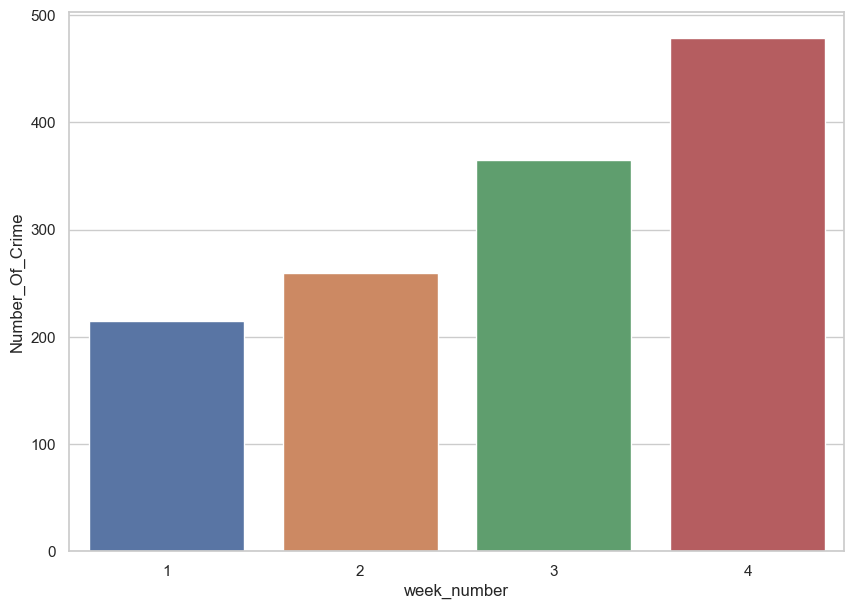

In [29]:
plt.figure(figsize=(10, 7))
sns.barplot(data = df, x=df.week_number,  y= df.Number_Of_Crime)

### [Q2] Is crime more prevalent in areas with a higher population density, fewer police personnel, and a larger precinct area?

In [4]:
conn = pymysql.connect(

    host ='127.0.0.1', # ip address of the server - remote location
    port =int(3306),
    user ='root',
    passwd ='Dhven@9450',
    db='crime_la',
    charset='utf8mb4'
    )

df1 = pd.read_sql_query("""SELECT precinct_code, count(officer_code) as officer_per_precinct FROM officer_t 
GROUP BY precinct_code
ORDER BY count(officer_code) DESC;""", conn)
df1.head(10)

,precinct_code,officer_per_precinct
0,3,11
1,4,10
2,2,9
3,1,7
4,6,6
5,5,6
6,7,5


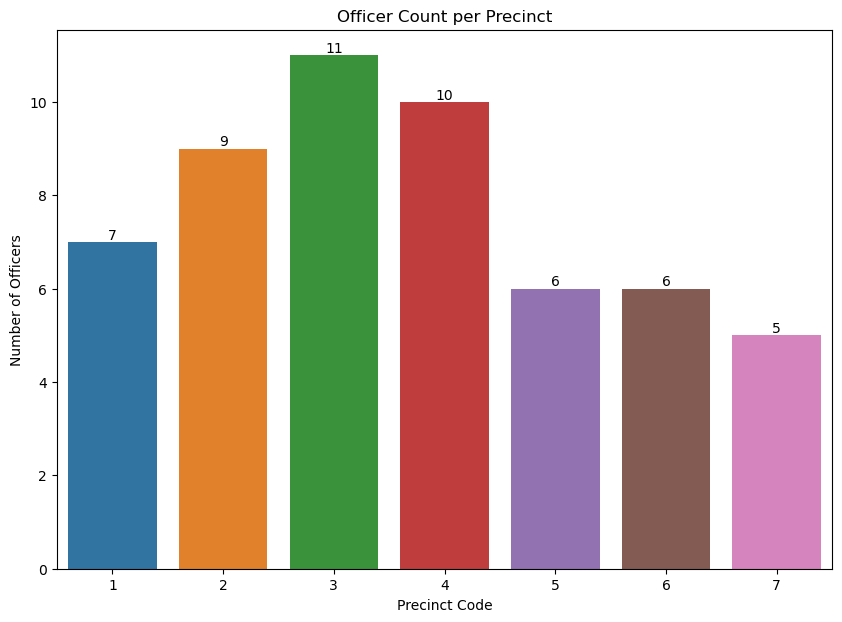

In [5]:

plt.figure(figsize=(10, 7))
ax = sns.barplot(data=df1, x='precinct_code', y='officer_per_precinct')

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Officer Count per Precinct')
plt.xlabel('Precinct Code')
plt.ylabel('Number of Officers')
plt.show()

In [6]:
conn = pymysql.connect(

    host ='127.0.0.1', # ip address of the server - remote location
    port =int(3306),
    user ='root',
    passwd ='Dhven@9450',
    db='crime_la',
    charset='utf8mb4'
    )

df2 = pd.read_sql_query("""SELECT o.precinct_code,l.area_code, l.population_density,  count(r.report_no)  as  "Number_Of_Crime"  
FROM location_t AS l
INNER JOIN report_t AS r ON l.area_code = r.area_code
INNER JOIN officer_t AS o ON o.officer_code = r.officer_code
GROUP BY o.precinct_code,l.area_code, l.population_density
ORDER BY  o.precinct_code DESC ;""", conn)
df2.head(15)

,precinct_code,area_code,population_density,Number_Of_Crime
0,7,1001,3200,122
1,6,990,6686,189
2,5,887,3409,74
3,5,893,6500,71
4,4,425,8500,233
5,3,336,4149,158
6,3,371,5500,156
7,2,261,8889,58
8,2,322,7800,56
9,2,323,4100,45


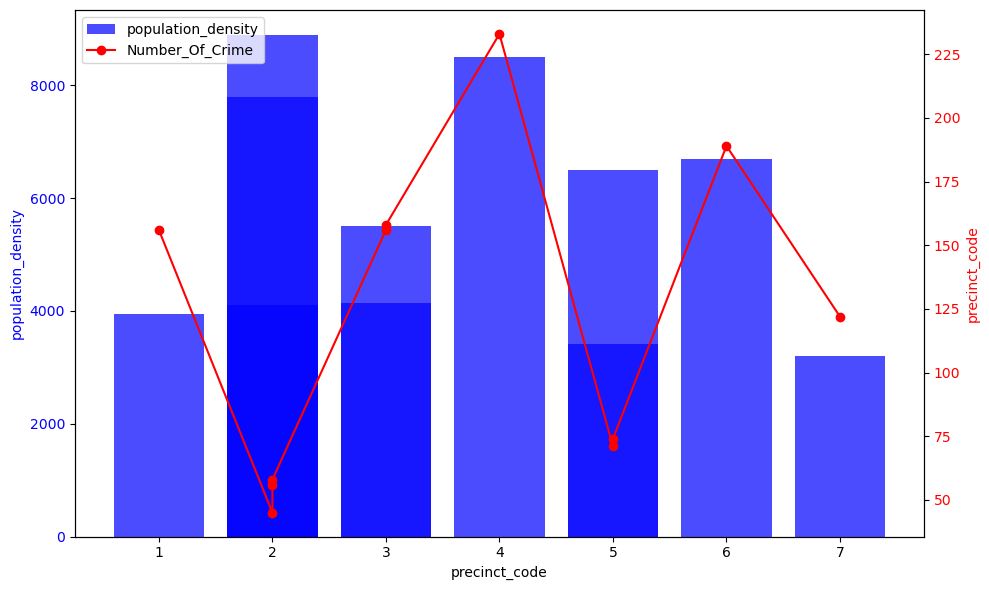

In [7]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot revenue as a bar
ax1.bar(df2['precinct_code'], df2['population_density'], color='b', alpha=0.7, label='population_density')
ax1.set_xlabel('precinct_code')
ax1.set_ylabel('population_density', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for the number of orders
ax2 = ax1.twinx()
ax2.plot(df2['precinct_code'], df2['Number_Of_Crime'], color='r', marker='o', label='Number_Of_Crime')
ax2.set_ylabel('precinct_code', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Combine the legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper left')



plt.tight_layout()
plt.show()

### [Q3] At what points of the day is the crime rate at its peak? Group this by the type of crime ?

In [8]:
df3a = pd.read_excel('qestion3.xls')

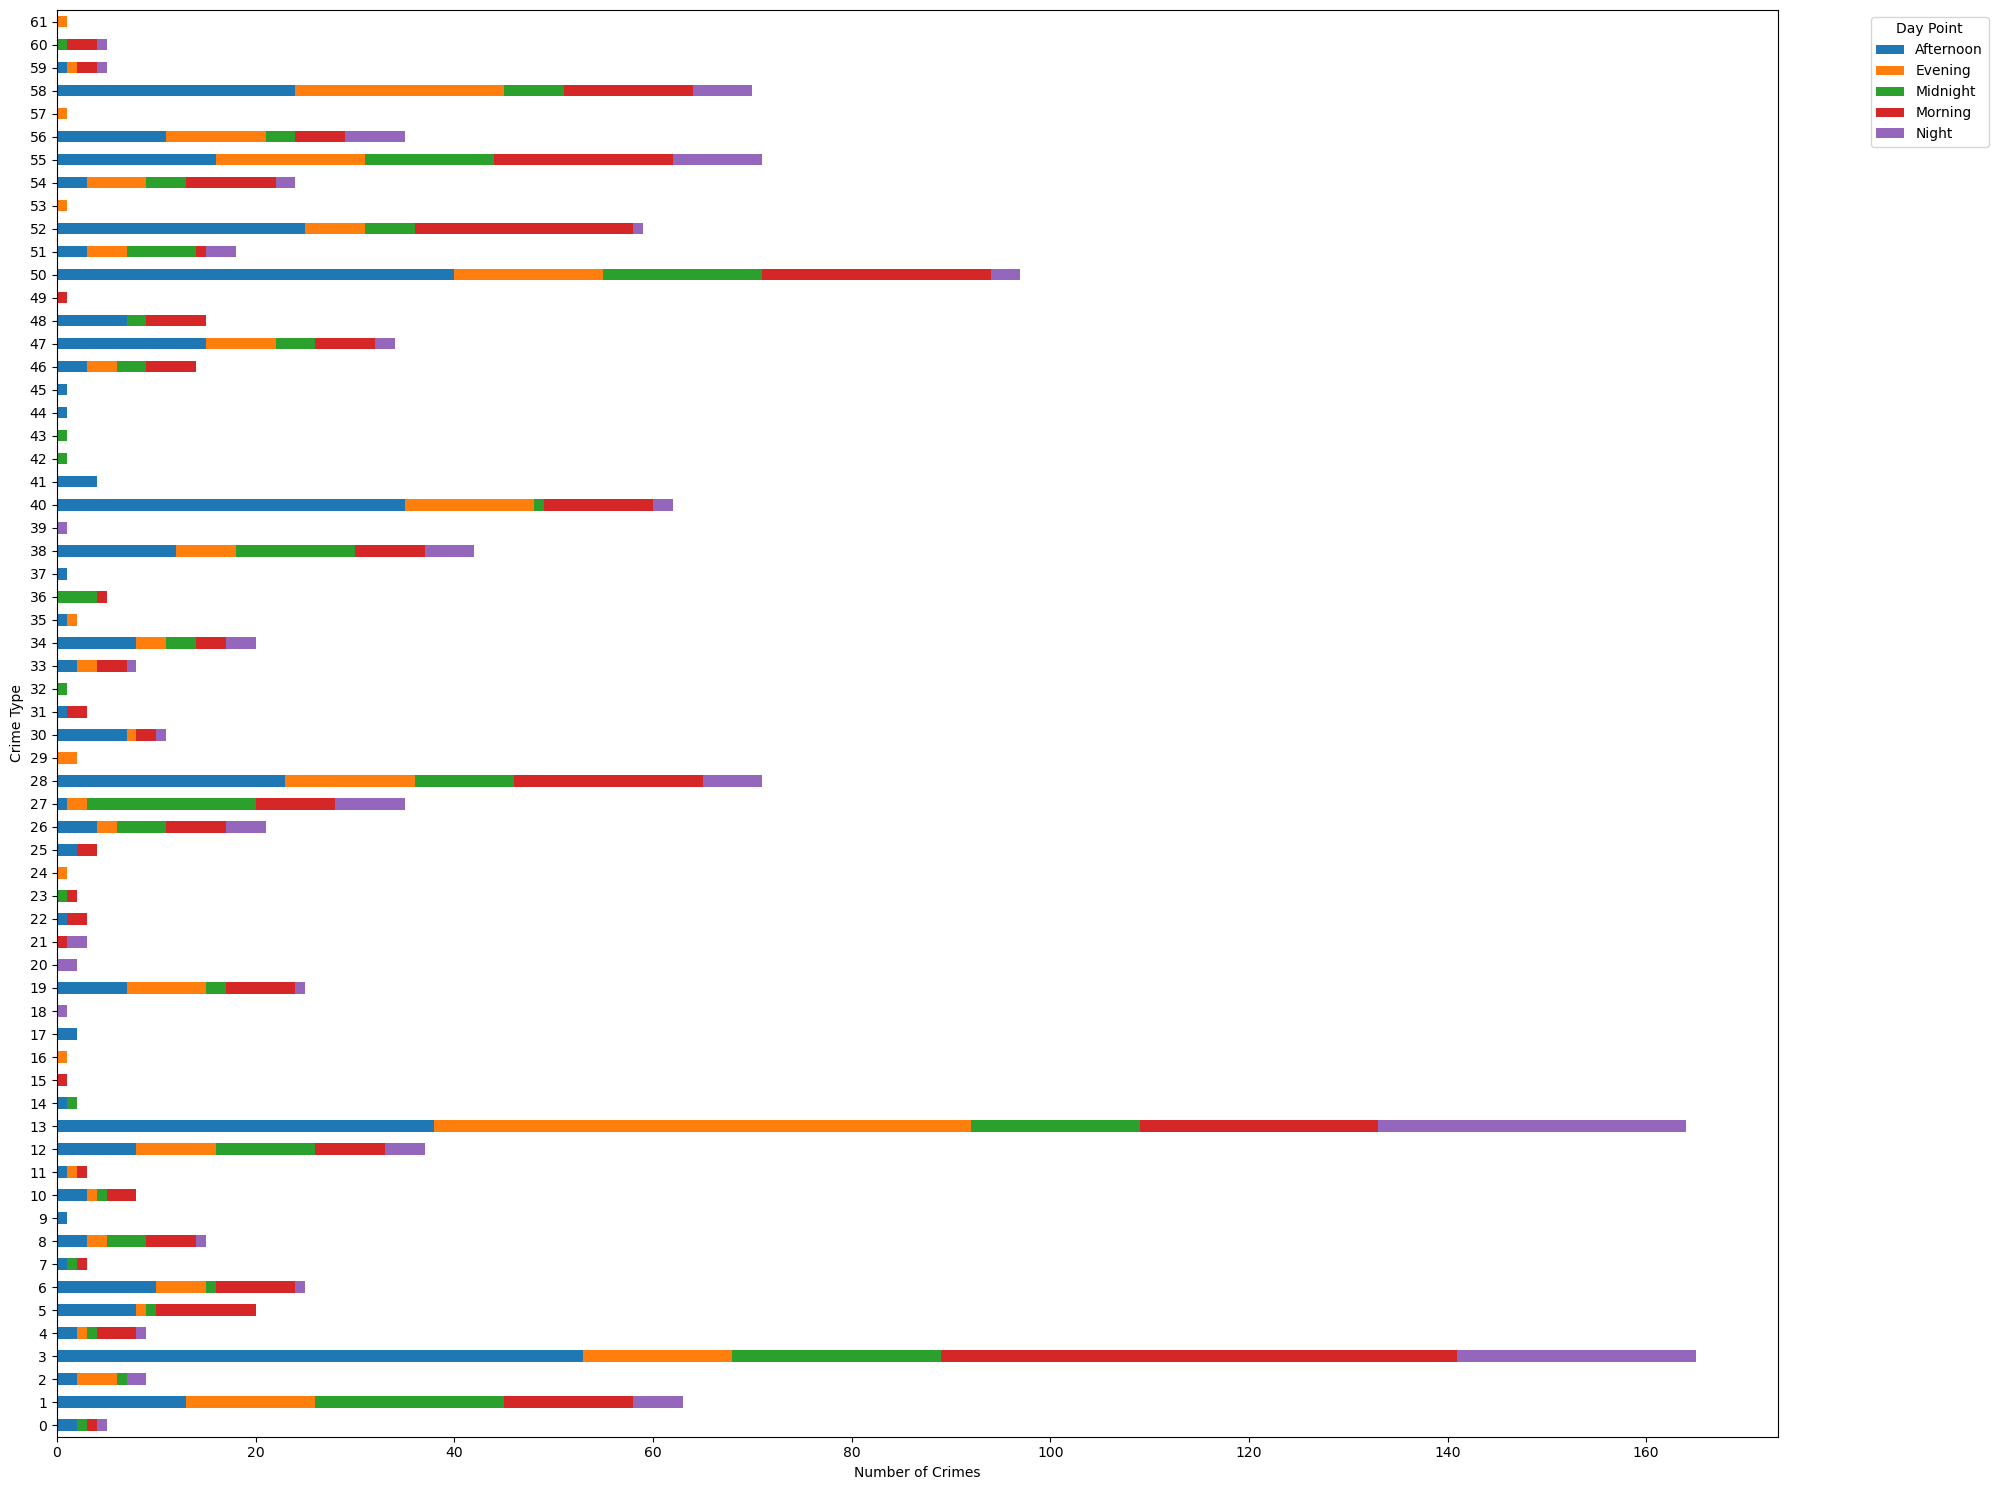

In [9]:

# Create a stacked horizontal bar chart
ax = df3a[['Afternoon', 'Evening', 'Midnight', 'Morning', 'Night']].plot(kind='barh', stacked=True, figsize=(20, 15))

# Customize the chart
ax.set_ylabel('Crime Type')
ax.set_xlabel('Number of Crimes')

# Show the legend
plt.legend(title='Day Point', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

### [Q4] At what point in the day do more crimes occur in a different locality?

In [10]:
df4a = pd.read_csv('Question 4.csv')
df4a.head()

,area_name,Afternoon,Evening,Midnight,Morning,Night
0,77th Street,17,15,10,10,6
1,Harbor,23,19,8,15,6
2,Hollenbeck,55,37,36,42,19
3,Hollywood,40,28,14,23,17
4,Newton,21,15,11,20,7


In [11]:
# Set the 'Area name' as the index
df4a.set_index('area_name', inplace=True)

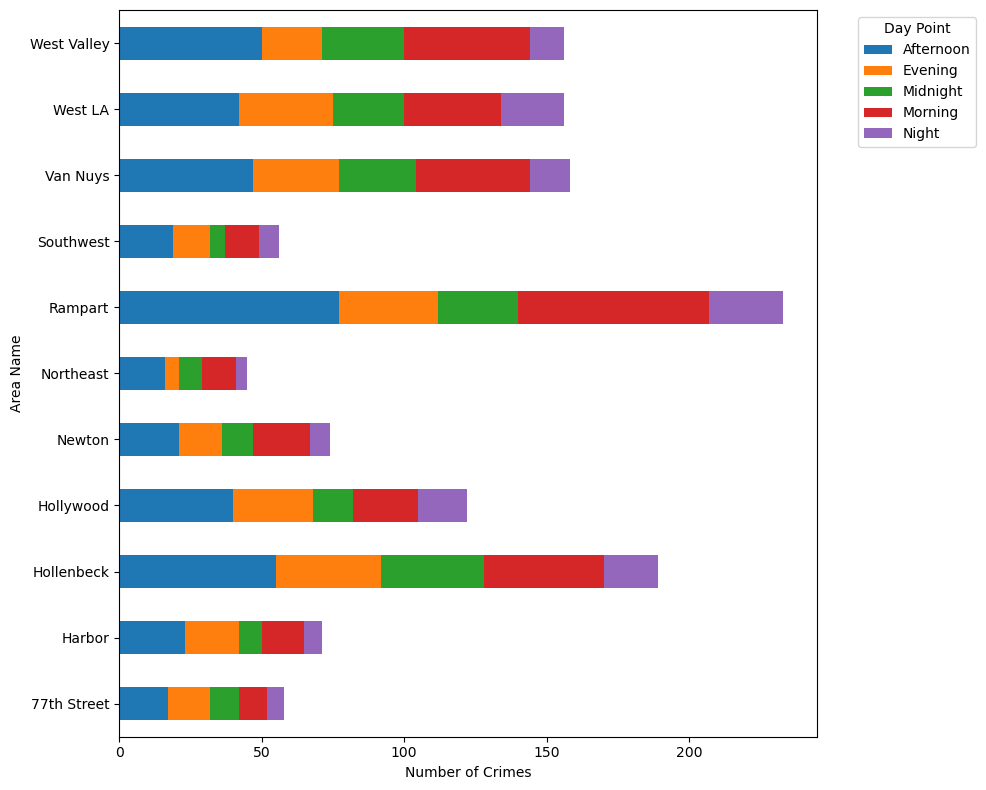

In [12]:

# Create a stacked horizontal bar chart
ax = df4a[['Afternoon', 'Evening', 'Midnight', 'Morning', 'Night']].plot(kind='barh', stacked=True, figsize=(10, 8))

# Customize the chart
ax.set_ylabel('Area Name')
ax.set_xlabel('Number of Crimes')

# Show the legend
plt.legend(title='Day Point', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

### [Q5] Which age group of people is more likely to fall victim to crimes at certain points in the day?

In [13]:
df5a = pd.read_csv('Question 5.csv')
df5a.head()

,Age Group,Afternoon,Evening,Midnight,Morning,Night
0,Adults,229,143,120,169,81
1,Kids,38,18,14,24,10
2,Middle age,75,44,32,70,24
3,Old,63,44,33,50,23
4,Teenage,2,2,2,6,2


In [14]:
# Set the 'Area name' as the index
df5a.set_index('Age Group', inplace=True)

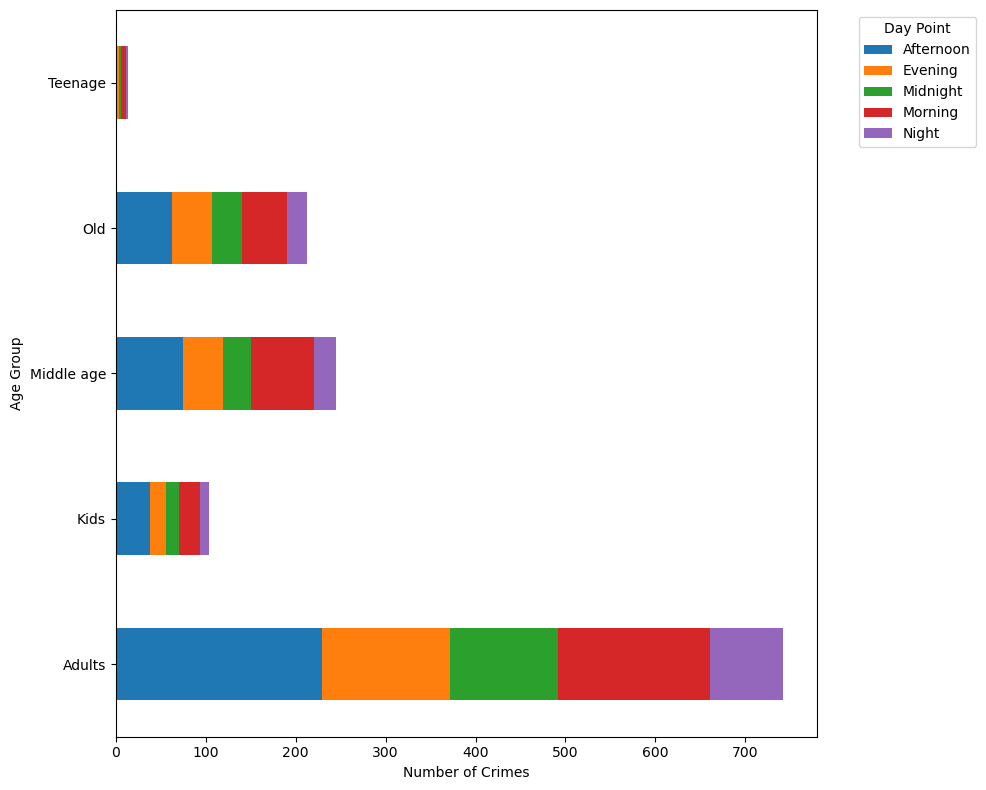

In [15]:

# Create a stacked horizontal bar chart
ax = df5a[['Afternoon', 'Evening', 'Midnight', 'Morning', 'Night']].plot(kind='barh', stacked=True, figsize=(10, 8))

# Customize the chart
ax.set_ylabel('Age Group')
ax.set_xlabel('Number of Crimes')

# Show the legend
plt.legend(title='Day Point', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

### [Q6] What is the status of reported crimes?

In [16]:
conn = pymysql.connect(

    host ='127.0.0.1', # ip address of the server - remote location
    port =int(3306),
    user ='root',
    passwd ='Dhven@9450',
    db='crime_la',
    charset='utf8mb4'
    )

df6 = pd.read_sql_query("""SELECT case_status_code, case_status_desc, count(report_no) AS  "Number_Of_Crime"    
FROM report_t
GROUP BY case_status_code, case_status_desc
ORDER BY  "Number_Of_Crime";""", conn)
df6.head(10)

,case_status_code,case_status_desc,Number_Of_Crime
0,IC,Invest Cont,1186
1,AA,Adult Arrest,94
2,AO,Adult Other,38


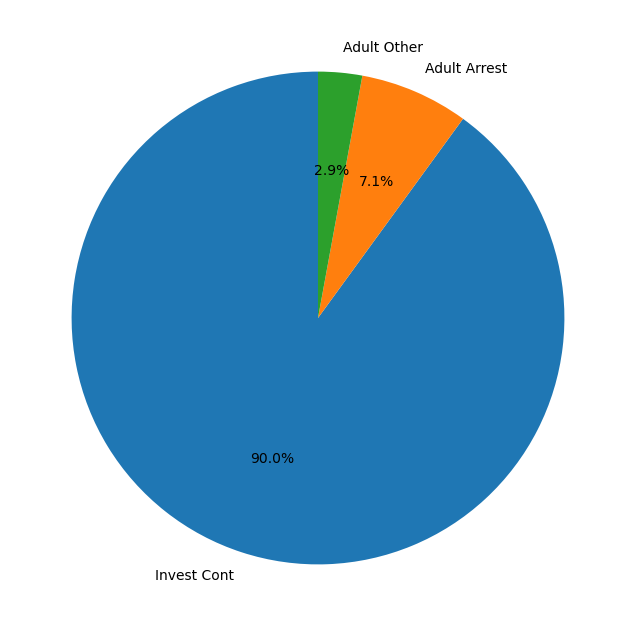

In [17]:
import matplotlib.pyplot as plt

# Assuming df6 has columns 'Number_Of_Crime' and 'case_status_desc'
plt.figure(figsize=(8, 8))  # Set the figsize parameter to adjust the size

plt.pie(df6['Number_Of_Crime'], labels=df6['case_status_desc'], autopct='%1.1f%%', startangle=90)

plt.show()

### [Q7] Does the existence of CCTV cameras deter crimes from happening?

In [30]:
conn = pymysql.connect(

    host ='127.0.0.1', # ip address of the server - remote location
    port =int(3306),
    user ='root',
    passwd ='Dhven@9450',
    db='crime_la',
    charset='utf8mb4'
    )

df7 = pd.read_sql_query(""" SELECT l.area_code, l.area_name, r.cctv_flag, count(r.report_no) AS  "Number_Of_Crime"    
FROM report_t AS r INNER JOIN
location_t as l ON l.area_code = r.area_code
GROUP BY l.area_code, l.area_name, r.cctv_flag
ORDER BY l.area_code, Number_Of_Crime DESC;""", conn)
df7.head(20)

,area_code,area_name,cctv_flag,Number_Of_Crime
0,223,West Valley,FALSE,97
1,223,West Valley,TRUE,59
2,261,77th Street,FALSE,41
3,261,77th Street,TRUE,17
4,322,Southwest,FALSE,37
5,322,Southwest,TRUE,19
6,323,Northeast,FALSE,29
7,323,Northeast,TRUE,16
8,336,Van Nuys,FALSE,124
9,336,Van Nuys,TRUE,34


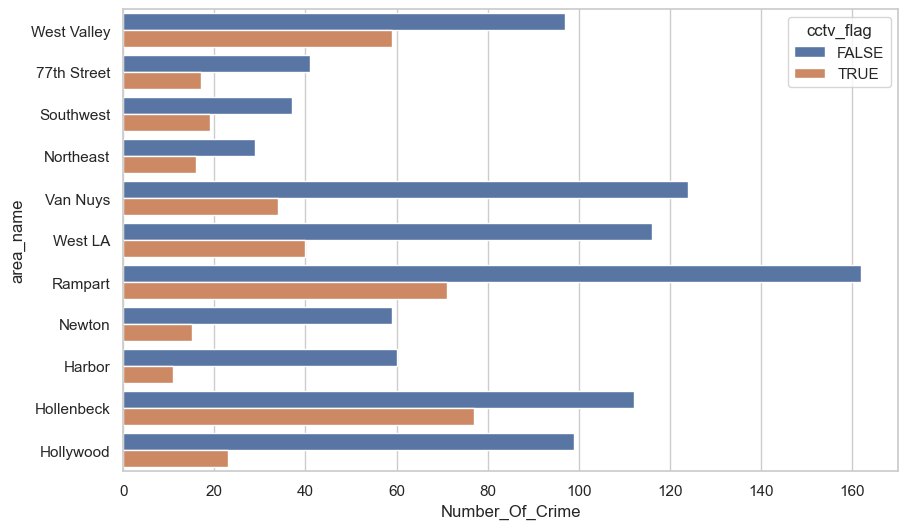

In [19]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(y='area_name', x='Number_Of_Crime', hue='cctv_flag', data=df7)
plt.show()

### [Q8] How much footage has been recovered from the CCTV at the crime scene?

In [20]:
conn = pymysql.connect(

    host ='127.0.0.1', # ip address of the server - remote location
    port =int(3306),
    user ='root',
    passwd ='Dhven@9450',
    db='crime_la',
    charset='utf8mb4'
    )

df8 = pd.read_sql_query("""SELECT l.area_name , l.cctv_count, r.cctv_flag, count(r.cctv_flag) as "CCTV_IN_CRIME_AREA"
FROM  location_t AS l
INNER JOIN report_t AS r ON l.area_code = r.area_code
GROUP BY l.area_name , l.cctv_count, r.cctv_flag
ORDER BY l.area_name , l.cctv_count;""", conn)
df8.head(10)

,area_name,cctv_count,cctv_flag,CCTV_IN_CRIME_AREA
0,77th Street,150,FALSE,41
1,77th Street,150,TRUE,17
2,Harbor,180,FALSE,60
3,Harbor,180,TRUE,11
4,Hollenbeck,170,FALSE,112
5,Hollenbeck,170,TRUE,77
6,Hollywood,280,FALSE,99
7,Hollywood,280,TRUE,23
8,Newton,275,FALSE,59
9,Newton,275,TRUE,15


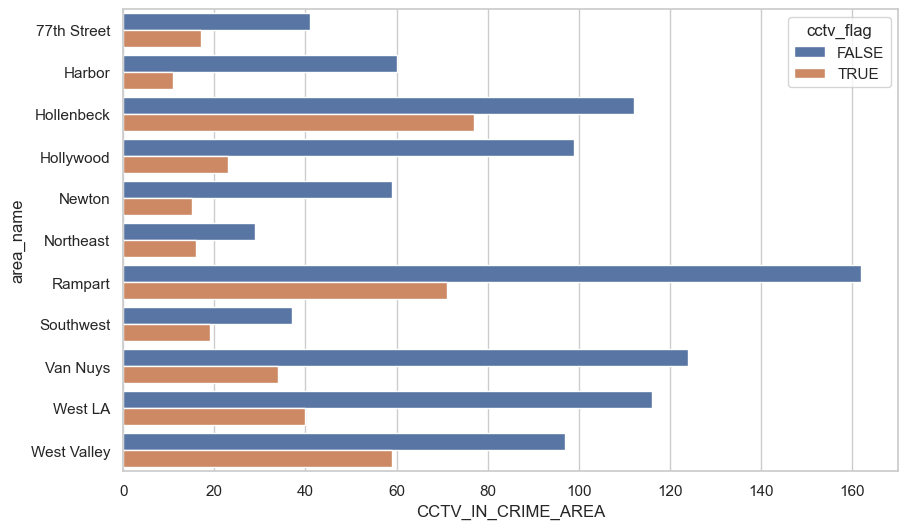

In [21]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(y='area_name', x='CCTV_IN_CRIME_AREA', hue='cctv_flag', data=df8)
plt.show()

### [Q9] Is crime more likely to be committed by relation of victims than strangers?

In [22]:
conn = pymysql.connect(

    host ='127.0.0.1', # ip address of the server - remote location
    port =int(3306),
    user ='root',
    passwd ='Dhven@9450',
    db='crime_la',
    charset='utf8mb4'
    )

df9a = pd.read_sql_query("""SELECT crime_type, offender_relation, count(report_no)  AS  "Number_Of_Crime" 
FROM report_t 
WHERE offender_relation = 'Yes'
GROUP BY crime_type, offender_relation
ORDER BY Number_Of_Crime DESC;""", conn)
df9a.head(30)

,crime_type,offender_relation,Number_Of_Crime
0,BURGLARY FROM VEHICLE,Yes,8
1,BATTERY - SIMPLE ASSAULT,Yes,7
2,THEFT-GRAND ($950.01 & OVER)EX,Yes,5
3,THEFT PLAIN - PETTY ($950 & UN,Yes,4
4,SHOPLIFTING - PETTY THEFT ($95,Yes,4
5,INTIMATE PARTNER - SIMPLE ASSA,Yes,3
6,VEHICLE - STOLEN,Yes,3
7,BRANDISH WEAPON,Yes,2
8,VANDALISM - MISDEAMEANOR ($399,Yes,2
9,BIKE - STOLEN,Yes,2


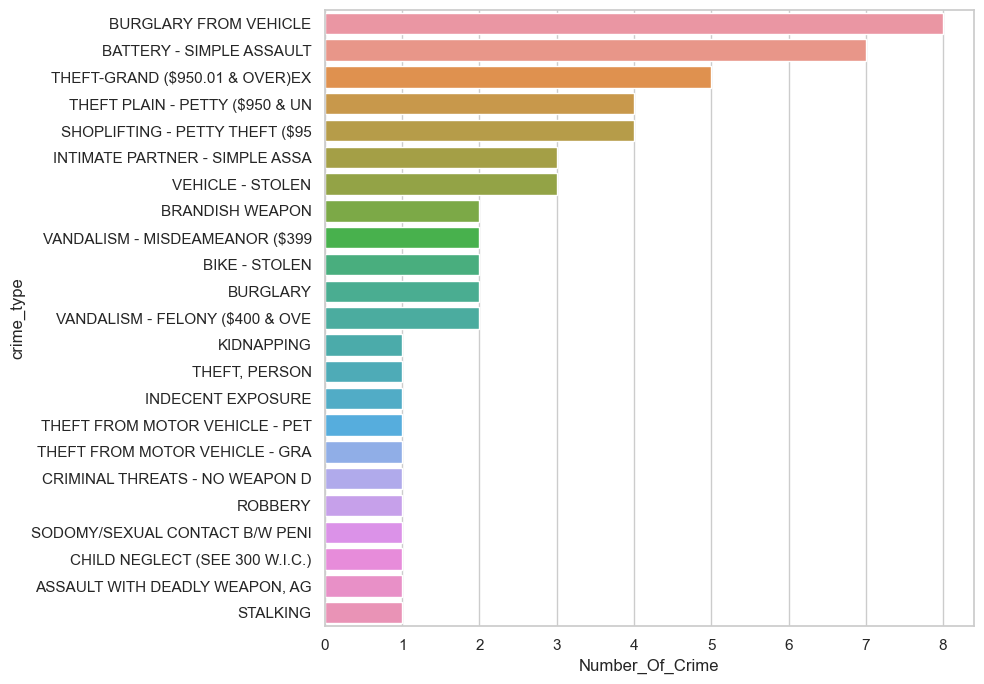

In [23]:
plt.figure(figsize=(10, 7))
sns.barplot(data=df9a, y='crime_type', x='Number_Of_Crime')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [24]:
conn = pymysql.connect(

    host ='127.0.0.1', # ip address of the server - remote location
    port =int(3306),
    user ='root',
    passwd ='Dhven@9450',
    db='crime_la',
    charset='utf8mb4'
    )

df9b = pd.read_sql_query("""SELECT offender_relation, count(report_no) AS  "Number_Of_Crime" 
FROM report_t 
GROUP BY offender_relation
ORDER BY Number_Of_Crime DESC;""", conn)
df9b.head(10)

,offender_relation,Number_Of_Crime
0,No,1263
1,Yes,55


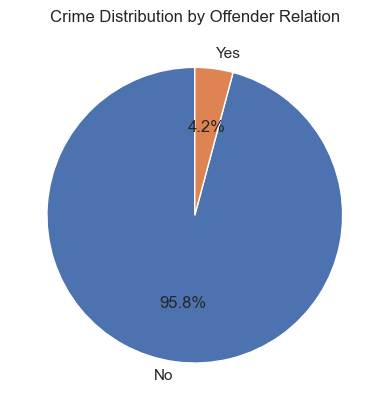

<Figure size 800x800 with 0 Axes>

In [25]:
plt.pie(df9b['Number_Of_Crime'], labels=df9b['offender_relation'], autopct='%1.1f%%', startangle=90)
plt.title('Crime Distribution by Offender Relation')
plt.figure(figsize=(8, 8))  # Set the figsize parameter to adjust the size
plt.show()

### [Q10] What are the methods used by the public to report a crime?

In [26]:
conn = pymysql.connect(

    host ='127.0.0.1', # ip address of the server - remote location
    port =int(3306),
    user ='root',
    passwd ='Dhven@9450',
    db='crime_la',
    charset='utf8mb4'
    )

df10 = pd.read_sql_query("""SELECT complaint_type , count(report_no) AS  "Number_Of_Crime"  
FROM report_t
GROUP BY complaint_type
ORDER BY Number_Of_Crime DESC;""", conn)
df10.head(10)

,complaint_type,Number_Of_Crime
0,Phone,810
1,In-Person,446
2,Email,62


<Axes: xlabel='complaint_type', ylabel='Number_Of_Crime'>

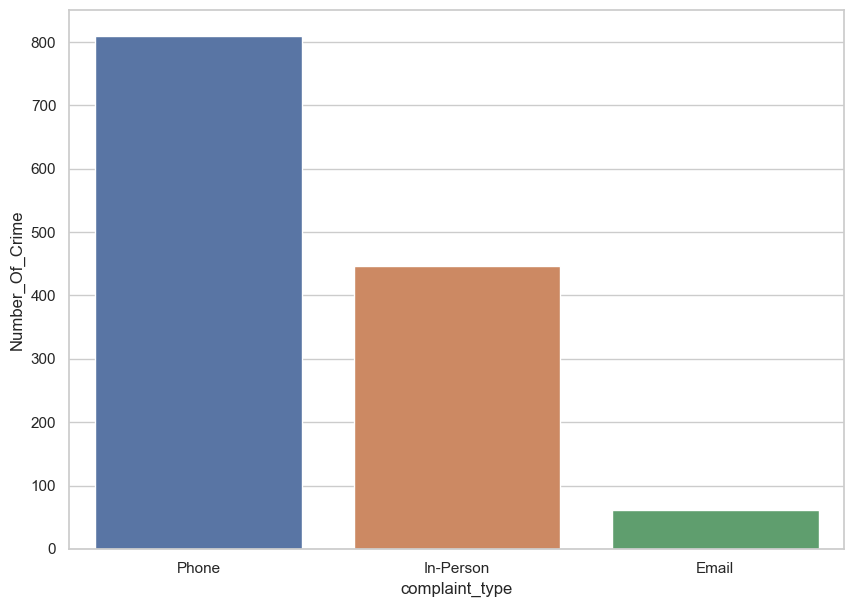

In [27]:
plt.figure(figsize=(10, 7))
sns.barplot(data = df10, x=df10.complaint_type,  y= df10.Number_Of_Crime)